# Dogs vs Cats

In [3]:
#| app
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

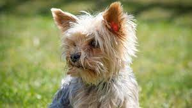

In [4]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im

In [5]:
#| export
learn = load_learner('cats.pkl')

In [6]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 1.0353e-05]))

In [7]:
#| export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [8]:
classify_image(im)

{'Dog': 0.9999896287918091, 'Cat': 1.035308014252223e-05}

In [9]:
from gradio.components import Image, Label

In [30]:
#| export

image =  Image(shape=(192,192))
label = Label()
examples = ['dog.jpeg', 'cat.jpeg', 'lemon.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=True, share=True)

# Export

In [14]:
nbdev.export.nb_export('app.ipynb', 'app')
print('Successful!')

Successful!


/root/.local/lib/python3.9/site-packages/nbdev/export.py:54: UserWarning: Notebook 'app.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
